## Importing the Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


## Importing Dataset

In [4]:
from google.colab import files
uploaded = files.upload()  # Opens file dialog

Saving archive (2).zip to archive (2).zip


In [5]:
from zipfile import ZipFile
import pandas as pd

# Unzip the archive
with ZipFile('archive (2).zip', 'r') as zip_ref:
    zip_ref.extractall('extracted_files')  # Creates a folder with contents

# Find and load the CSV (assuming it's the only CSV inside)
import glob
csv_path = glob.glob('extracted_files/**/*.csv', recursive=True)[0]
df = pd.read_csv(csv_path)

print(f"Loaded {csv_path} with {len(df)} rows")

Loaded extracted_files/survey lung cancer.csv with 309 rows


In [6]:
# Load datasetdf = pd.read_csv("/content/extracted_files/archive (2)/survey lung cancer.csv")

# Encode categorical columns
encoder = LabelEncoder()
df['GENDER'] = encoder.fit_transform(df['GENDER'])
df['LUNG_CANCER'] = encoder.fit_transform(df['LUNG_CANCER'])  # YES=1, NO=0

# Convert symptom values: 1 (No) → 0, 2 (Yes) → 1
symptom_cols = df.columns.difference(['GENDER', 'AGE', 'LUNG_CANCER'])
df[symptom_cols] = df[symptom_cols].applymap(lambda x: 1 if x == 2 else 0)

# Features and target
X = df.drop("LUNG_CANCER", axis=1)
y = df["LUNG_CANCER"]


/tmp/ipython-input-6-3469791275.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[symptom_cols] = df[symptom_cols].applymap(lambda x: 1 if x == 2 else 0)


## Data Cleaning and Manipulation

In [6]:
df.head(n=10)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
5,F,75,1,2,1,1,2,2,2,2,1,2,2,1,1,YES
6,M,52,2,1,1,1,1,2,1,2,2,2,2,1,2,YES
7,F,51,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
8,F,68,2,1,2,1,1,2,1,1,1,1,1,1,1,NO
9,M,53,2,2,2,2,2,1,2,1,2,1,1,2,2,YES


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 309 non-null    int64
 1   AGE                    309 non-null    int64
 2   SMOKING                309 non-null    int64
 3   YELLOW_FINGERS         309 non-null    int64
 4   ANXIETY                309 non-null    int64
 5   PEER_PRESSURE          309 non-null    int64
 6   CHRONIC DISEASE        309 non-null    int64
 7   FATIGUE                309 non-null    int64
 8   ALLERGY                309 non-null    int64
 9   WHEEZING               309 non-null    int64
 10  ALCOHOL CONSUMING      309 non-null    int64
 11  COUGHING               309 non-null    int64
 12  SHORTNESS OF BREATH    309 non-null    int64
 13  SWALLOWING DIFFICULTY  309 non-null    int64
 14  CHEST PAIN             309 non-null    int64
 15  LUNG_CANCER            309 non-null    i

### No null values present

In [32]:
df["GENDER"].unique()

array([1, 0])

In [31]:
df["LUNG_CANCER"].unique()

array([1, 0])

## Label Encoding

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
encoder = LabelEncoder()
df['GENDER'] = encoder.fit_transform(df['GENDER'])
df['LUNG_CANCER'] = encoder.fit_transform(df['LUNG_CANCER'])

In [10]:
# function for plotting
def plot(col, df=df):
    return df.groupby(col)['LUNG_CANCER'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(8,5))

<Axes: xlabel='GENDER'>

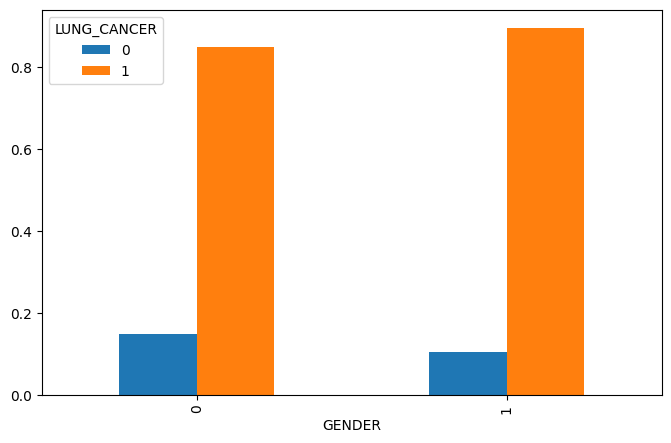

In [ ]:
plot('GENDER')

<Axes: xlabel='ALLERGY '>

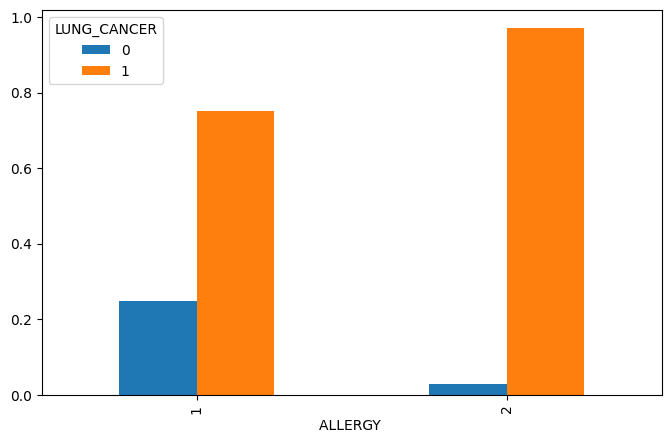

In [ ]:
plot('ALLERGY ')

In [18]:
df['LUNG_CANCER'].value_counts()

,count
LUNG_CANCER,
1,270
0,39


## Finding Correlation in Features and Label

In [11]:
#Finding Correlation
cn=df.corr()
cn

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
GENDER,1.000000,0.021306,0.036277,-0.212959,-0.152127,-0.275564,-0.204606,-0.083560,0.154251,0.141207,0.454268,0.133303,-0.064911,-0.078161,0.362958,0.067254
AGE,0.021306,1.000000,-0.084475,0.005205,0.053170,0.018685,-0.012642,0.012614,0.027990,0.055011,0.058985,0.169950,-0.017513,-0.001270,-0.018104,0.089465
SMOKING,0.036277,-0.084475,1.000000,-0.014585,0.160267,-0.042822,-0.141522,-0.029575,0.001913,-0.129426,-0.050623,-0.129471,0.061264,0.030718,0.120117,0.058179
YELLOW_FINGERS,-0.212959,0.005205,-0.014585,1.000000,0.565829,0.323083,0.041122,-0.118058,-0.144300,-0.078515,-0.289025,-0.012640,-0.105944,0.345904,-0.104829,0.181339
ANXIETY,-0.152127,0.053170,0.160267,0.565829,1.000000,0.216841,-0.009678,-0.188538,-0.165750,-0.191807,-0.165750,-0.225644,-0.144077,0.489403,-0.113634,0.144947
PEER_PRESSURE,-0.275564,0.018685,-0.042822,0.323083,0.216841,1.000000,0.048515,0.078148,-0.081800,-0.068771,-0.159973,-0.089019,-0.220175,0.366590,-0.094828,0.186388
CHRONIC DISEASE,-0.204606,-0.012642,-0.141522,0.041122,-0.009678,0.048515,1.000000,-0.110529,0.106386,-0.049967,0.002150,-0.175287,-0.026459,0.075176,-0.036938,0.110891
FATIGUE,-0.083560,0.012614,-0.029575,-0.118058,-0.188538,0.078148,-0.110529,1.000000,0.003056,0.141937,-0.191377,0.146856,0.441745,-0.132790,-0.010832,0.150673
ALLERGY,0.154251,0.027990,0.001913,-0.144300,-0.165750,-0.081800,0.106386,0.003056,1.000000,0.173867,0.344339,0.189524,-0.030056,-0.061508,0.239433,0.327766
WHEEZING,0.141207,0.055011,-0.129426,-0.078515,-0.191807,-0.068771,-0.049967,0.141937,0.173867,1.000000,0.265659,0.374265,0.037834,0.069027,0.147640,0.249300


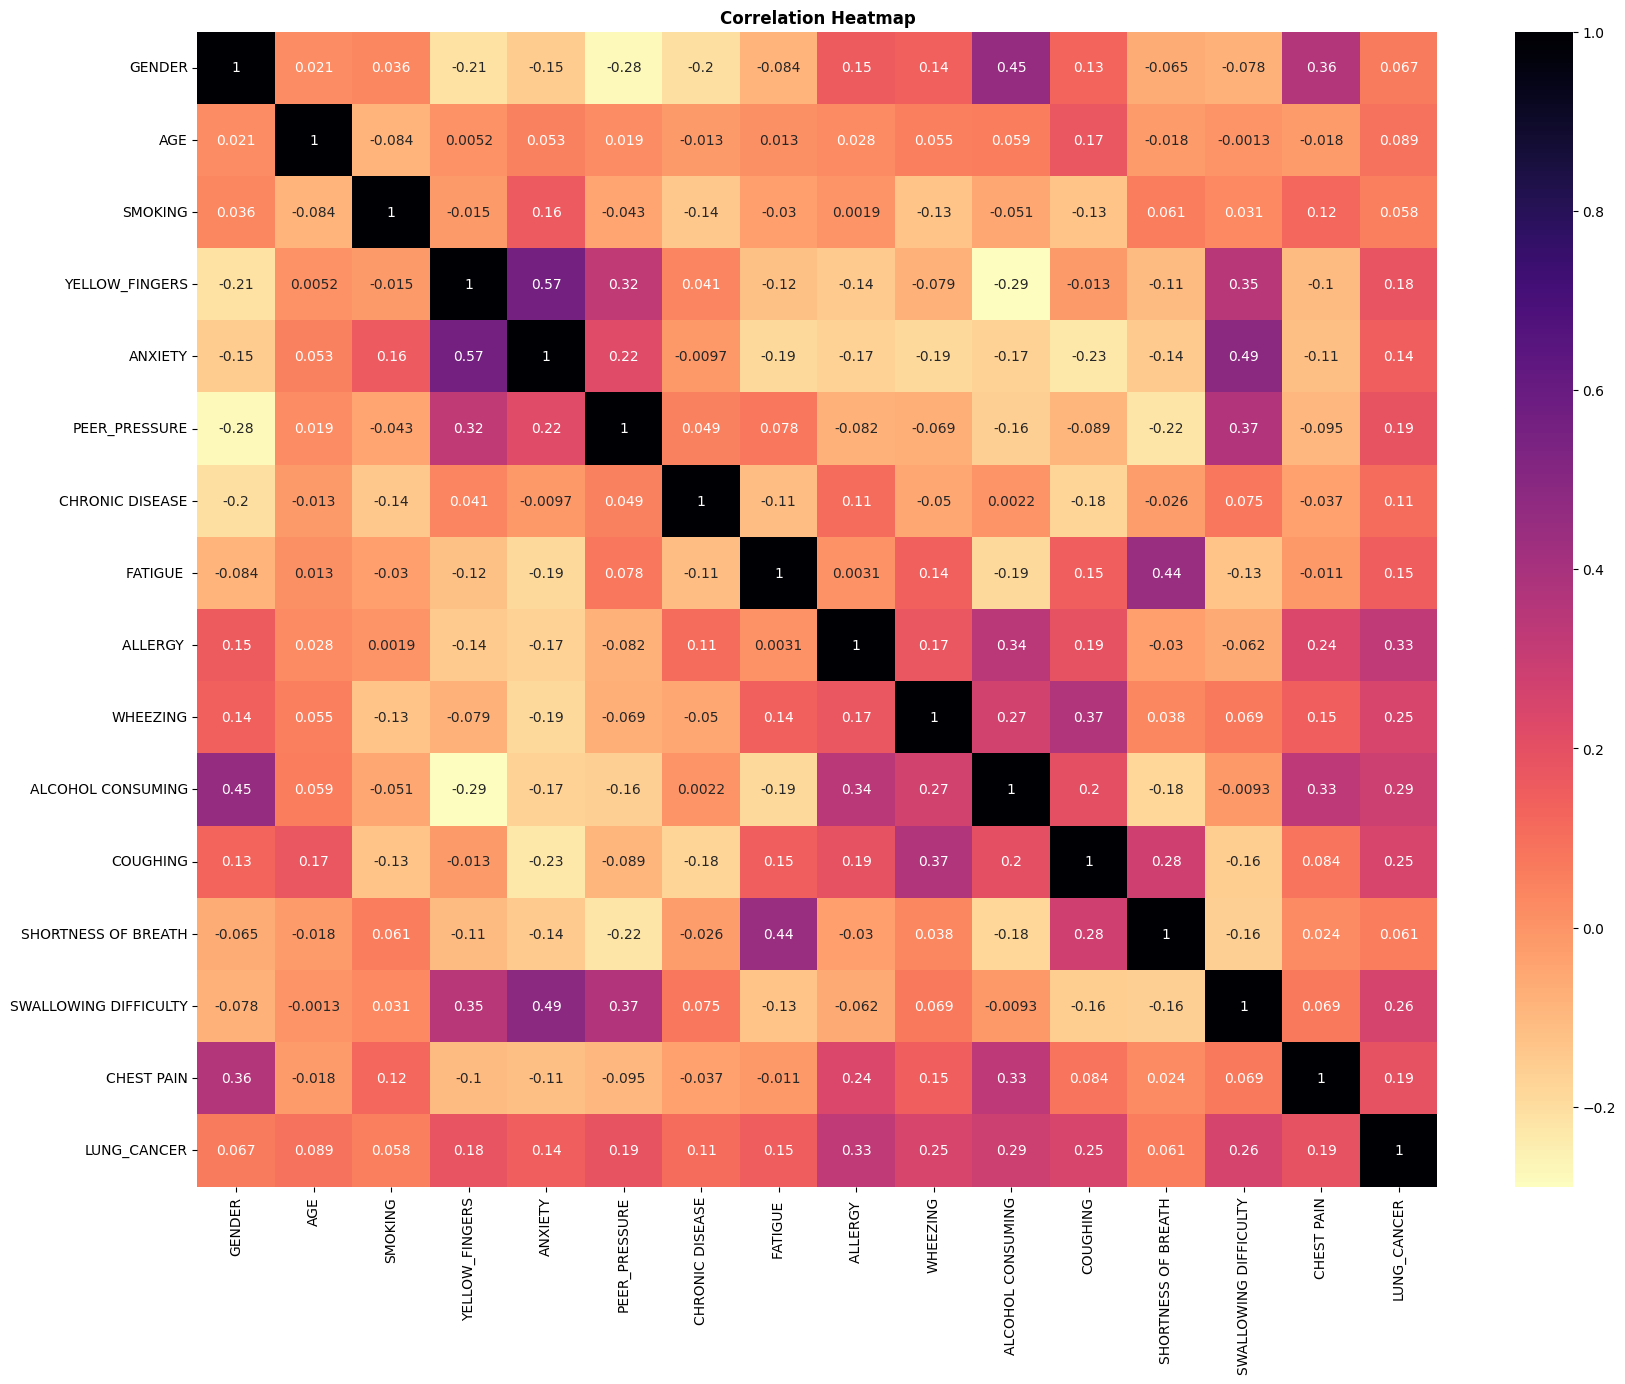

In [12]:
plt.figure(figsize = (20,15))
sns.heatmap(df.corr(), annot = True, cmap = "magma_r")
plt.title("Correlation Heatmap",fontdict = {"fontweight":"bold"})
plt.show()

<Axes: >

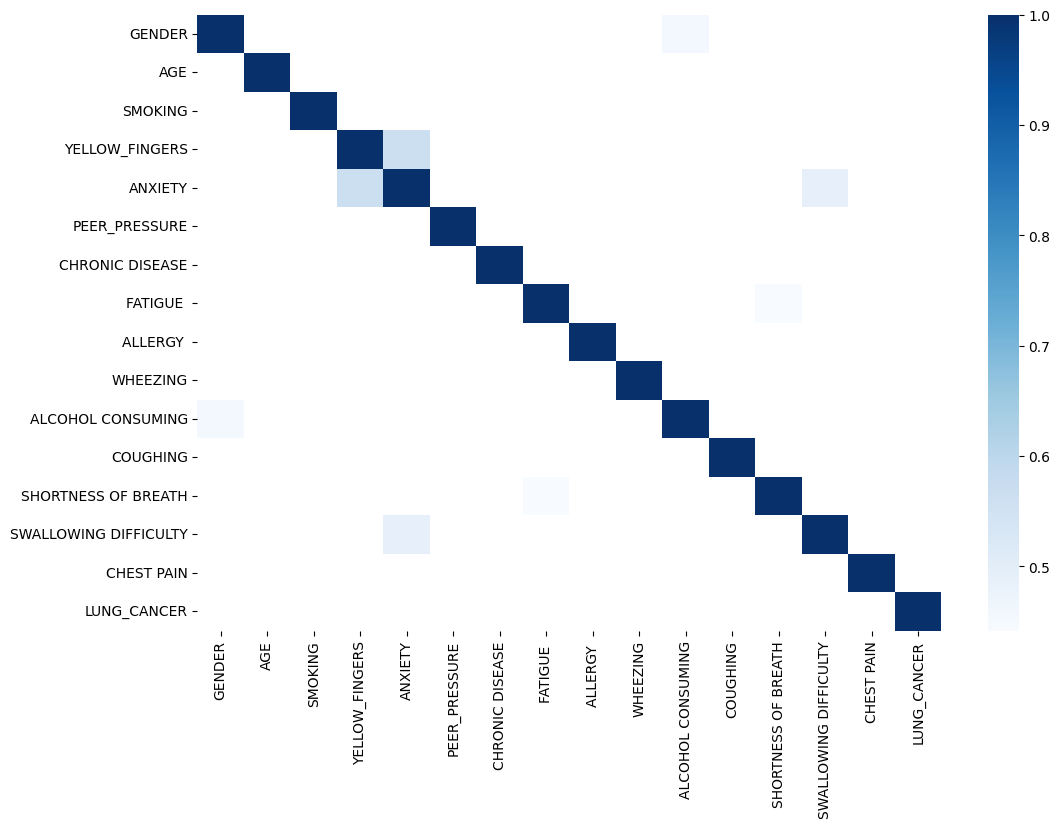

In [ ]:
kot = cn[cn>=.40]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Blues")

## Assingning Features and Labels

In [13]:
x = df.drop(["LUNG_CANCER"], axis = 1)

In [14]:
y = df["LUNG_CANCER"]

In [20]:
x

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,56,0,0,0,1,1,1,0,0,1,1,1,1,0
305,1,70,1,0,0,0,0,1,1,1,1,1,1,0,1
306,1,58,1,0,0,0,0,0,1,1,1,1,0,0,1
307,1,67,1,0,1,0,0,1,1,0,1,1,1,0,1


In [21]:
y

,LUNG_CANCER
0,1
1,1
2,0
3,0
4,0
...,...
304,1
305,1
306,1
307,1


## Splitting Test and Train Data

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


## Testing Random Forest Classifier Model

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
# Initialize and train model
model = RandomForestClassifier(
    n_estimators=100,
    criterion="entropy",
    class_weight='balanced',
    random_state=42
)

model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       random_state=42)

✅ Random Forest Results with Class Weighting:
Accuracy: 0.8870967741935484

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.50      0.53         8
           1       0.93      0.94      0.94        54

    accuracy                           0.89        62
   macro avg       0.75      0.72      0.73        62
weighted avg       0.88      0.89      0.88        62



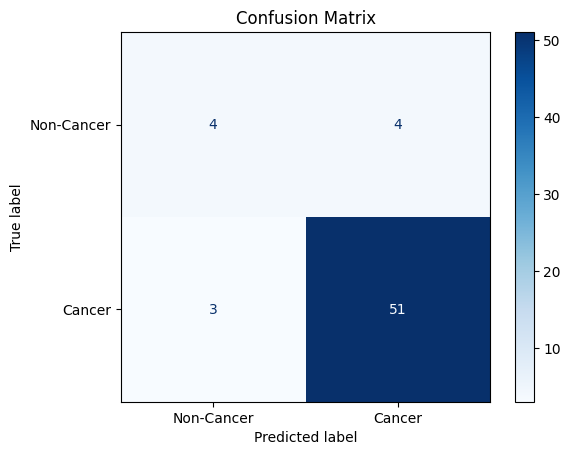

In [22]:
# Predict and evaluate
y_pred = model.predict(X_test)

print("✅ Random Forest Results with Class Weighting:")
print("Accuracy:", model.score(X_test, y_test))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-Cancer", "Cancer"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [47]:
# Save RF test predictions
rf_test_probs = model.predict_proba(X_test)
rf_test_preds = model.predict(X_test)

# Save to file
np.save('rf_test_probs.npy', rf_test_probs)
np.save('rf_test_preds.npy', rf_test_preds)
files.download('rf_test_probs.npy')
files.download('rf_test_preds.npy')

# Save the RF model
import joblib
joblib.dump(model, 'lung_cancer_rf.joblib')
files.download('lung_cancer_rf.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>